In [5]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

import sys
sys.path.append('scripts/')

import localization
import separation
from preprocessing import preprocess_disease

In [6]:
ppi_file = 'data/ppi.csv'
dga_file = "data/disease_gene.tsv"

dga, ppi = preprocess_disease(ppi_file, dga_file)

In [7]:
dmt = dga[dga.diseaseName == 'dementia']

In [8]:
dmt

,geneSymbol,diseaseName
35403,APP,dementia
35404,COL4A1,dementia
35405,CP,dementia
35406,CSF1R,dementia
35407,CST3,dementia
35408,DNMT1,dementia
35409,FUS,dementia
35410,GRN,dementia
35411,MAPT,dementia
35412,NOTCH3,dementia


In [9]:
dmt_genes = list(dmt.geneSymbol.unique())

In [10]:
len(dmt_genes)

17

In [11]:
gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

# Removing self loops
sl = nx.selfloop_edges(gppi)
gppi.remove_edges_from(sl)

In [12]:
# Find dementia genes in ppi
dmt_genes_in_ppi = list()

# Extract the disease module for Dementia
for n in list(gppi.nodes):
    if n in dmt_genes:
        dmt_genes_in_ppi.append(n)

In [13]:
dmt_genes_in_ppi

['GRN',
 'HTRA1',
 'DNMT1',
 'APP',
 'PSEN2',
 'SLC6A3',
 'CSF1R',
 'PRNP',
 'FUS',
 'COL4A1',
 'MAPT',
 'NOTCH3',
 'CP',
 'CST3',
 'TYROBP',
 'SLC9A8',
 'TREM2']

In [14]:
# Extract the subgraph (disease module) for Dementia
dmt_module = gppi.subgraph(dmt_genes_in_ppi).copy()

In [15]:
# Calculate the number of nodes (genes) in the Dementia disease module
num_nodes = dmt_module.number_of_nodes()
print("Number of nodes (genes) in the Dementia disease module:", num_nodes)

# Calculate the number of edges (interactions) in the Dementia disease module
num_edges = dmt_module.number_of_edges()
print("Number of edges (interactions) in the Dementia disease module:", num_edges)

Number of nodes (genes) in the Dementia disease module: 17
Number of edges (interactions) in the Dementia disease module: 7


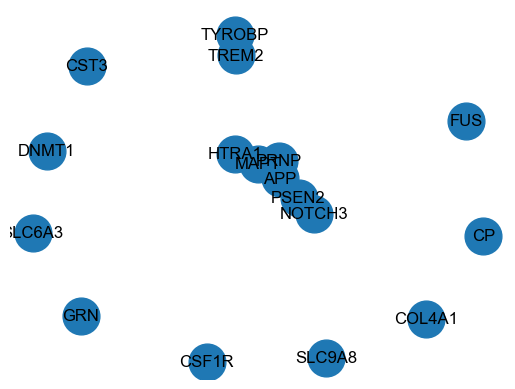

In [20]:
pos = nx.spring_layout(dmt_module)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(dmt_module, pos, node_size=700)

# Edges
nx.draw_networkx_edges(dmt_module, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(dmt_module, pos, font_size=12)

# plt.title('Dementia Disease Module Network')
plt.axis('off')
plt.show()

In [21]:
# Use the localization module for LCC and random comparison
lcc = localization.get_lcc(gppi, dmt_genes_in_ppi)
sig_dict = localization.get_random_comparison(gppi, dmt_genes_in_ppi, 1000)

In [24]:
random_lcc = sig_dict['LCC_list']

print('Mean: ',sig_dict['mean'])

print('Std: ',sig_dict['std'])

print('z-score: ',sig_dict['z_score'])

print('p-value: ',sig_dict['p_value'])

Mean:  1.222
Std:  0.500715488076812
z-score:  9.542345131666936
p-value:  0.0


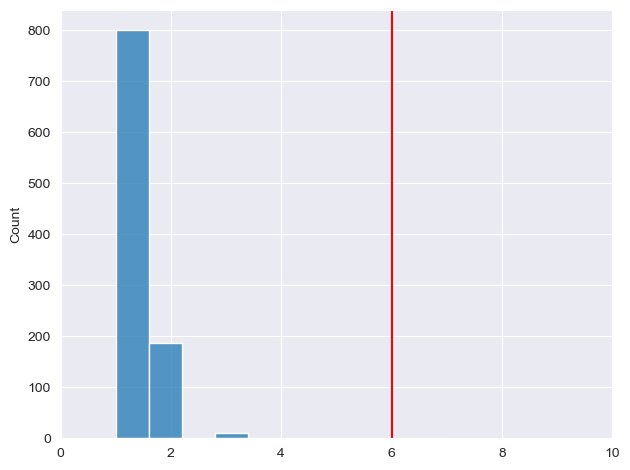

In [30]:
sns.histplot(data=random_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [26]:
sig_dp_dict = localization.get_random_comparison(gppi, dmt_genes_in_ppi, 1000, degree_preserving=True)

In [27]:
random_dp_lcc = sig_dp_dict['LCC_list']

print('Mean: ',sig_dp_dict['mean'])

print('Std: ',sig_dp_dict['std'])

print('z-score: ',sig_dp_dict['z_score'])

print('p-value: ',sig_dp_dict['p_value'])

Mean:  2.194
Std:  0.9603978342332932
z-score:  3.962941048319225
p-value:  7.403206733447298e-05


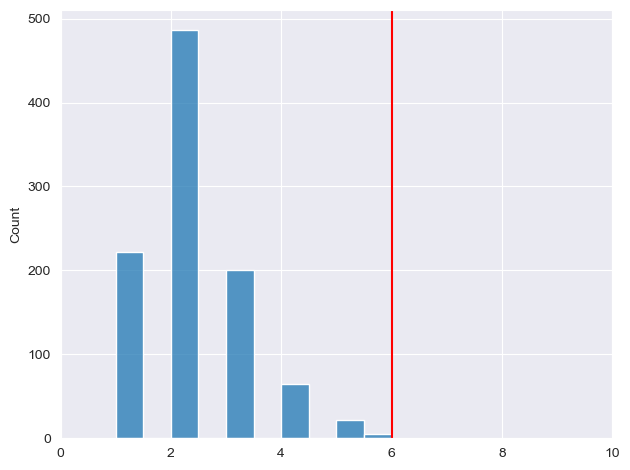

In [28]:
sns.histplot(data=random_dp_lcc,
             bins=10)

plt.axvline(len(lcc), color='r')

plt.xlim(0, 10)
plt.tight_layout()
plt.show()